In [1]:
# importing essential libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import zscore
import re as re
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading all dataset related to this project
train = pd.read_csv(r"train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Sex

In [6]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
null_values = train['Sex'].isnull().sum()
print("Number of null values on Sex feature:", null_values)

Number of null values on Sex feature: 0


In [9]:
train[['Sex', 'Survived']].groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
men = train.loc[train['Sex'] == 'male']['Survived']
rate_men = sum(men)/len(men)
print("No: of males", len(men))
men_casuality = len(men)- sum(men)
print("Male casuality:", men_casuality)
print("No: of male survived", sum(men))
print("% of Men survived", round(rate_men*100, 2))


No: of males 577
Male casuality: 468
No: of male survived 109
% of Men survived 18.89


In [11]:
women = train.loc[train['Sex'] == 'female']['Survived']
rate_female = sum(women)/len(women)
print("No: of women", len(women))
women_casuality = len(women)- sum(women)
print("Women casuality:", women_casuality)
print("No: of women survived", sum(women))
print("% of female survived", round(rate_female*100, 2))

No: of women 314
Women casuality: 81
No: of women survived 233
% of female survived 74.2


In [12]:
print("Total Survived:", sum(train['Survived']))
print("Total Casuality:", women_casuality + men_casuality )

Total Survived: 342
Total Casuality: 549


In [13]:
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [14]:
original_value = label_encoder.inverse_transform([0])
print(original_value)

['female']


0 is female and 1 is male

In [15]:
train['Sex'].dtypes

dtype('int32')


##  Age 

In [16]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
null_values = train['Age'].isnull().sum()
print("Number of null values on Age feature:", null_values)

Number of null values on Age feature: 177


In [18]:
train['Age'] = train.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

use mean to update null values in Sex feature, and i used group by mean of pclass and Sex to get an accurate value

In [20]:
after_transform = train['Age'].isnull().sum()
print("Number of null values after transform: ", after_transform)

Number of null values after transform:  0


In [21]:
train['Age'].describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

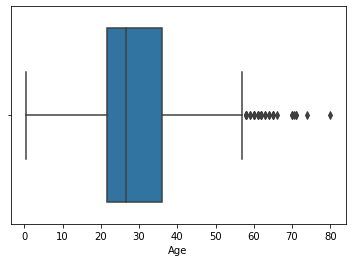

In [22]:
sns.boxplot(train['Age'], orient = 'h')

Outliers, the age varies from 0.5 to 80 years. I feel this info is great, passangers has a age more than 60 and less than 80 are rare, so its important to check wheather old age people survived this disaster or not. So am keeping this outliers.

In [23]:
bins = [0, 12, 28, 40, 60, float('inf')]
labels = ['0-12', '12-20', '18-40', '40-60', '60+']
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, include_lowest=True)
print(train[['Age', 'Age_Group']])

       Age Age_Group
0    22.00     12-20
1    38.00     18-40
2    26.00     12-20
3    35.00     18-40
4    35.00     18-40
..     ...       ...
886  27.00     12-20
887  19.00     12-20
888  21.75     12-20
889  26.00     12-20
890  32.00     18-40

[891 rows x 2 columns]


In [24]:
train['Age_Group'].value_counts()

12-20    429
18-40    222
40-60    149
0-12      69
60+       22
Name: Age_Group, dtype: int64

In [25]:
train[['Age_Group', 'Survived']].groupby(['Age_Group'])['Survived'].mean()

Age_Group
0-12     0.579710
12-20    0.331002
18-40    0.450450
40-60    0.369128
60+      0.227273
Name: Survived, dtype: float64

From the info its clear that importance was given to kids(0-12), they need guidance to survive, less imporance was given to old age people, only 22% old age people survived. second position for survival was given to people having an age group of 18 to 40

In [26]:
train['Age_Group'] = label_encoder.fit_transform(train['Age_Group'])


used label encoder to convert a category into numeric values.

In [27]:
train['Age_Group'].value_counts()

1    429
2    222
3    149
0     69
4     22
Name: Age_Group, dtype: int64

In [28]:
original_value = label_encoder.inverse_transform([4])
print(original_value)

['60+']


0 => ['1-12']
1 => ['12-20']
2 => ['18-40']
3 => ['40-60']
4 => ['60+']

these are the expansion for labels given

# Fare

In [29]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
train['Fare'].info()

AttributeError: 'Series' object has no attribute 'info'

In [31]:
null_values = train['Fare'].isnull().sum()
print("Number of null values in Fare feature:", null_values)

Number of null values in Fare feature: 0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

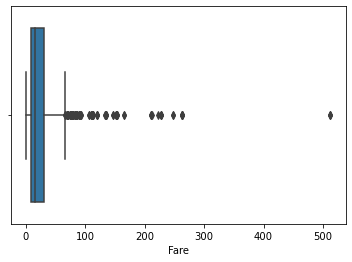

In [32]:
sns.boxplot(train['Fare'])

Presence of outliers is too high. 

In [33]:
train['fare_zscore'] = zscore(train['Fare'])
outliers = train[(train['fare_zscore'] > 3) | (train['fare_zscore'] < -3)]
print(outliers[['Fare', 'fare_zscore']])
print(outliers.count())
print("Number of outliers:", len(outliers))

         Fare  fare_zscore
27   263.0000     4.647001
88   263.0000     4.647001
118  247.5208     4.335332
258  512.3292     9.667167
299  247.5208     4.335332
311  262.3750     4.634417
341  263.0000     4.647001
377  211.5000     3.610065
380  227.5250     3.932723
438  263.0000     4.647001
527  221.7792     3.817033
557  227.5250     3.932723
679  512.3292     9.667167
689  211.3375     3.606793
700  227.5250     3.932723
716  227.5250     3.932723
730  211.3375     3.606793
737  512.3292     9.667167
742  262.3750     4.634417
779  211.3375     3.606793
PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            20
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
Age_Group      20
fare_zscore    20
dtype: int64
Number of outliers: 20


used zscore to find out outliers

In [34]:
train = train[(train['fare_zscore'] < 3)]

new dataframe by removing 20 outliers.

In [35]:
train['Fare'].value_counts(ascending = True)

10.5167     1
6.2375      1
14.0000     1
8.8500      1
12.8750     1
           ..
26.0000    31
7.7500     34
7.8958     38
13.0000    42
8.0500     43
Name: Fare, Length: 240, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

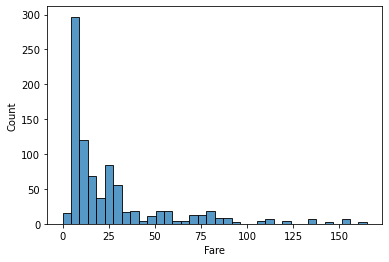

In [36]:
sns.histplot(train['Fare'])

most of the passangers are paying a fare lower than 25 dollars

In [37]:
bins = [0, 25, 75, 125, float('inf')]
labels = ['0-25', '25-75', '75-125', '125+']
train['Fare_Group'] = pd.cut(train['Fare'], bins=bins, labels=labels, include_lowest=True)
print(train[['Fare', 'Fare_Group']])

        Fare Fare_Group
0     7.2500       0-25
1    71.2833      25-75
2     7.9250       0-25
3    53.1000      25-75
4     8.0500       0-25
..       ...        ...
886  13.0000       0-25
887  30.0000      25-75
888  23.4500       0-25
889  30.0000      25-75
890   7.7500       0-25

[871 rows x 2 columns]


In [38]:
train_fare = train[['Fare_Group', 'Survived']].groupby(['Fare_Group'])['Survived'].mean()
train_fare

Fare_Group
0-25      0.287253
25-75     0.455696
75-125    0.779661
125+      0.777778
Name: Survived, dtype: float64

People who paid a higher fare had more chances for survival

In [39]:
train['NewFareGroup'] = label_encoder.fit_transform(train['Fare_Group'])

In [40]:
trainFare = train[['Fare_Group','Survived']].groupby(['Fare_Group'], as_index = False).value_counts(ascending = True)
# trainFare['Survived'] = train['Survived'].apply(lambda x: 'alive' if x == 1 else 'dead')
trainFare

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [41]:
train[['Fare_Group', 'Survived']].groupby(['Fare_Group'],as_index = False).count()

,Fare_Group,Survived
0,0-25,557
1,25-75,237
2,75-125,59
3,125+,18


In [42]:
original_value = label_encoder.inverse_transform([3])
print(original_value)

['75-125']


0 = ['0-25'], 1 = ['125+'] , 2 = ['25-75'] , 3 = ['75-125']

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,fare_zscore,Fare_Group,NewFareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,-0.502445,0-25,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0.786845,25-75,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,-0.488854,0-25,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0.420730,25-75,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,-0.486337,0-25,0


In [44]:
drop_list = ['PassengerId', 'Age', 'Fare', 'fare_zscore', 'Fare_Group']

In [45]:
train = train.drop(columns=drop_list)
#removing unwanted features.

In [46]:
train.shape

(871, 11)

## Pclass

In [47]:
train['Pclass'].info()

AttributeError: 'Series' object has no attribute 'info'

No null values

In [48]:
train['Pclass'].value_counts()

3    491
1    196
2    184
Name: Pclass, dtype: int64

3 categories for Pclass and class 3 has most number of passangers

In [49]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [50]:
trainPclass = train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

In [51]:
survival_counts = train.groupby(['Pclass', 'Survived']).size().unstack()
survival_counts = pd.DataFrame(survival_counts)
survival_counts

Survived,0,1
Pclass,,
1,74,122
2,97,87
3,372,119


In [52]:
train_mean = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()
train_mean

,Pclass,Survived
0,1,0.622449
1,2,0.472826
2,3,0.242363


In [53]:
train_pclass = train[['Pclass', 'Survived']]

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

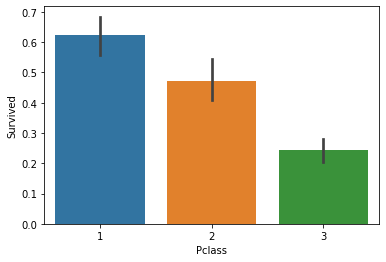

In [54]:
sns.barplot(x='Pclass', y='Survived', data=train_pclass)


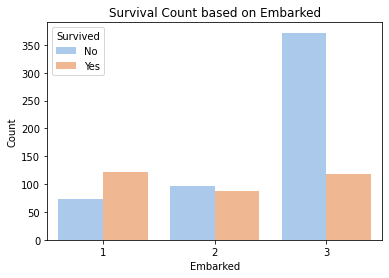

In [55]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='pastel')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Count based on Embarked')
plt.legend(title='Survived', labels=['No', 'Yes'])

Less number of people are staying in Pclass 1 but survival is high and vicevera for Pclass 3

## Family

In [56]:
train['SibSp'].value_counts()

0    595
1    207
2     26
4     18
3     13
8      7
5      5
Name: SibSp, dtype: int64

In [57]:
train['SibSp'].isnull().sum()

0

Most of the passangers does not have siblings (~600). 

In [58]:
train['Parch'].value_counts()

0    670
1    113
2     74
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64

In [59]:
train['Parch'].isnull().sum()

0

In [60]:
train['FamilySize'] = train['SibSp'] + train['Parch']
train['FamilySize'].value_counts()

0     530
1     155
2     101
3      29
5      18
4      13
6      12
10      7
7       6
Name: FamilySize, dtype: int64

In [61]:
trainFamilySize = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean()
trainFamilySize


,FamilySize,Survived
0,0,0.298113
1,1,0.541935
2,2,0.584158
3,3,0.724138
4,4,0.076923
5,5,0.055556
6,6,0.333333
7,7,0.000000
8,10,0.000000


Text(0, 0.5, 'Survival Chance')

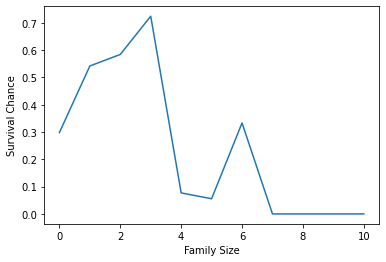

In [62]:
plt.plot(trainFamilySize['FamilySize'], trainFamilySize['Survived'])
plt.xlabel('Family Size')
plt.ylabel('Survival Chance')

Insight is nuclear family or family with count 3 had more chances for survival.

In [63]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Group,NewFareGroup,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,NaN,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,C85,C,2,2,1
2,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,NaN,S,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,C123,S,2,2,1
4,0,3,"Allen, Mr. William Henry",1,0,0,373450,NaN,S,2,0,0


In [64]:
train['Alone'] = 0
train.loc[train['FamilySize'] == 0, 'Alone'] = 1

In [65]:
train['Alone'].info()

AttributeError: 'Series' object has no attribute 'info'

No null values

In [ ]:
train[['Alone']].groupby(['Alone']).value_counts()

Number of passangers travelling alone is huge. So need to check the chances of survival.

In [66]:
train[['Alone','Survived']].groupby(['Alone']).mean()

,Survived
Alone,
0,0.498534
1,0.298113


Survival chances of alone passangers are low.

## Embarked

In [67]:
train['Embarked'].value_counts()

S    636
C    156
Q     77
Name: Embarked, dtype: int64

In [68]:
train['Embarked'].info()

AttributeError: 'Series' object has no attribute 'info'

2 null values found. filling categorical values using mode

In [69]:
train['Embarked'] = train.groupby(['Pclass', 'Sex'])['Embarked'].transform(lambda x: x.fillna(x.mode().iloc[0]))

The mode() function returns a pandas Series, and I need to extract the first element from it (the most frequent value) using .iloc[0].

In [70]:
train['Embarked'].info()

AttributeError: 'Series' object has no attribute 'info'

In [71]:
train[['Embarked', 'Survived']].groupby(['Embarked']).value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [72]:
train[['Embarked']].groupby(['Embarked']).value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

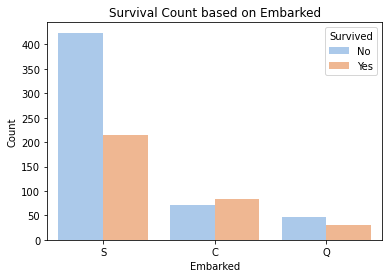

In [73]:
# sns.set(style="whitegrid")
sns.countplot(x='Embarked', hue='Survived', data=train, palette='pastel')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Count based on Embarked')
plt.legend(title='Survived', labels=['No', 'Yes'])

here number of people from C had higher chances for survival but passangers are less. most passangers are from S

In [74]:
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])

In [75]:
original_value = label_encoder.inverse_transform([2])
print(original_value)

['S']


0 => ['C'],
1 => ['Q'], 
2 => ['S']

# Title

In [76]:

def get_title(Name):
    title_search = re.search(' ([A-Za-z]+)\.', Name)
    if title_search:
        return title_search.group(1)
    return ""

train['Title'] = train['Name'].apply(get_title)
print("1 => Male, 0 => female")
train['Title']

1 => Male, 0 => female


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 871, dtype: object

In [77]:
train['Title'].value_counts()

Mr          509
Miss        173
Mrs         122
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [78]:
train['Title'].isnull().count()

871

In [79]:
print(pd.crosstab(train['Title'], train['Sex']))

Sex         0    1
Title             
Capt        0    1
Col         0    2
Countess    1    0
Don         0    1
Dr          1    6
Jonkheer    0    1
Lady        1    0
Major       0    2
Master      0   40
Miss      173    0
Mlle        2    0
Mme         1    0
Mr          0  509
Mrs       122    0
Ms          1    0
Rev         0    6
Sir         0    1


many titles with one or two passangers so merging that all and renaming it as rare.

In [80]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [81]:
train['Title'].value_counts()

Mr        509
Miss      173
Mrs       122
Master     40
Rare       23
Mlle        2
Mme         1
Ms          1
Name: Title, dtype: int64

feel like some titles are miss spelled so replacing it with correct.


In [82]:
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [83]:
result = train[['Title', 'Survived']].groupby(['Title'], as_index = False).agg({ 'Survived': 'mean'})
# result.columns = ['Title', 'Survival Rate', 'Count']

# Display the result
print(result)

    Title  Survived
0  Master  0.575000
1    Miss  0.687500
2      Mr  0.155206
3     Mrs  0.788618
4    Rare  0.347826


In [84]:
train[['Title', 'Survived']].groupby(['Title'], as_index = False).count()

,Title,Survived
0,Master,40
1,Miss,176
2,Mr,509
3,Mrs,123
4,Rare,23


from this info also majority of passangers from Mr category, but survival chances was only 15 percentage.

In [85]:
train['Title'] = label_encoder.fit_transform(train['Title'])

In [86]:
original_value = label_encoder.inverse_transform([4])
print(original_value)

['Rare']


0 = ['Master']
1 = ['Miss']
2 = ['Mr']
3 = ['Mrs']
4 = ['Rare']

In [87]:
train

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Group,NewFareGroup,FamilySize,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,NaN,2,1,0,1,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,C85,0,2,2,1,0,3
2,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,NaN,2,1,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,C123,2,2,2,1,0,3
4,0,3,"Allen, Mr. William Henry",1,0,0,373450,NaN,2,2,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,0,0,211536,NaN,2,1,0,0,1,4
887,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,B42,2,1,2,0,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,NaN,2,1,0,3,0,1
889,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,C148,0,1,2,0,1,2


# Cabin

In [88]:
train['Cabin'].value_counts()

B96 B98    4
G6         4
F33        3
F2         3
E101       3
          ..
C7         1
C54        1
E36        1
C106       1
C148       1
Name: Cabin, Length: 137, dtype: int64

In [89]:
train['Cabin'].notna().value_counts()

False    684
True     187
Name: Cabin, dtype: int64

In [90]:
print(pd.pivot_table(train, index = 'Survived', values = ['Cabin','Parch'] ,aggfunc ='count'))
print()

          Cabin  Parch
Survived              
0            63    543
1           124    328



In [91]:
train[['Cabin', 'Survived']].groupby(['Cabin']).mean()

,Survived
Cabin,
A10,0.0
A14,0.0
A16,1.0
A19,0.0
A20,1.0
...,...
F33,1.0
F38,0.0
F4,1.0


In [92]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33',
       'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12',
       'D26', 'C110', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15',
       'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99',
       'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36',
       'C54', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T',
       'C128', 'D37', 'B35', 'E50', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'D49', 'B20', 'F G63', 'E24', 'C90', 'E8', 'D45', 'C46',
       'D30', 'E121', 'D11', 'E77', 'F38', 'D6', 'B82 B84', 'D17', 'A3

Every bain starts with an alphabet convert into group of alphabets

In [93]:
train['Cabin_Start'] = train['Cabin'].str[0]

In [94]:
train['Cabin_Start'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [95]:

train['Cabin_Start'].isna().sum()

684

In [96]:
train['Cabin_Start'].value_counts()

C    51
B    38
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_Start, dtype: int64

In [97]:
train['Cabin_Start'] = train.groupby(['Pclass'])['Cabin_Start'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [98]:
train['Cabin_Start'].value_counts()

F    660
C     88
B     38
D     33
E     32
A     15
G      4
T      1
Name: Cabin_Start, dtype: int64

By imputing values i found that most of the passangers belongs to F category

In [99]:
train[['Cabin_Start', 'Survived']].groupby(['Cabin_Start']).mean()

,Survived
Cabin_Start,
A,0.466667
B,0.710526
C,0.545455
D,0.757576
E,0.750000
F,0.295455
G,0.500000
T,0.000000


Survival chances are high for B,D,E cabins. all these 3 classes had a total of approx 100 passangers and their survival chances are more than 72 percentage

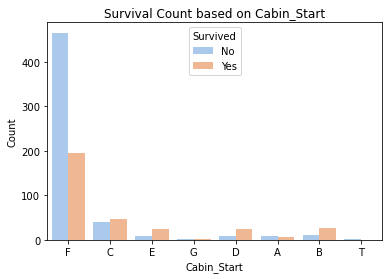

In [100]:
sns.countplot(x='Cabin_Start', hue='Survived', data=train, palette='pastel')
plt.xlabel('Cabin_Start')
plt.ylabel('Count')
plt.title('Survival Count based on Cabin_Start')
plt.legend(title='Survived', labels=['No', 'Yes'])

From the bar graph its clear that most of the people are in F cabin, and survival chances are very low.

In [101]:
train['Cabin_Start'] = label_encoder.fit_transform(train['Cabin_Start'])

In [102]:
original_value = label_encoder.inverse_transform([7])
print(original_value)

['T']


0 = A, 
1 = B,
2 = C,
3 = D,
4 = E,
5 = F,
6 = G,
7 = T

# Ticket

In [103]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '330959', '349216', 'PC 17601', 'PC 17569',
       '335677', 'C.A. 24579', 'PC 17604', '113789', '2677', 'A./5. 2152',
       '345764', '2651', '7546', '11668', '349253', 'SC/Paris 2123',
       '330958', 'S.C./A.4. 23567', '370371', '14311', '2662', '349237',
       '3101295', 'A/4. 39886', 'PC 17572', '2926', '113509', '19947',
       'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144', '2669', '113572',
       '36973', '347088', 'PC 17605', '2661', 'C.A. 29395', 'S.P. 3464',
       '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879', '2680', '1601',
       '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./

I didnt found any relation so removing ticket

In [104]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Group,NewFareGroup,FamilySize,Alone,Title,Cabin_Start
0,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,NaN,2,1,0,1,0,2,5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,C85,0,2,2,1,0,3,2
2,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,NaN,2,1,0,0,1,1,5
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,C123,2,2,2,1,0,3,2
4,0,3,"Allen, Mr. William Henry",1,0,0,373450,NaN,2,2,0,0,1,2,5


In [105]:
drop_list = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train = train.drop(drop_list, axis = 1)


removing unwanted features from dataset

In [106]:
train.head()

,Survived,Pclass,Sex,Embarked,Age_Group,NewFareGroup,FamilySize,Alone,Title,Cabin_Start
0,0,3,1,2,1,0,1,0,2,5
1,1,1,0,0,2,2,1,0,3,2
2,1,3,0,2,1,0,0,1,1,5
3,1,1,0,2,2,2,1,0,3,2
4,0,3,1,2,2,0,0,1,2,5


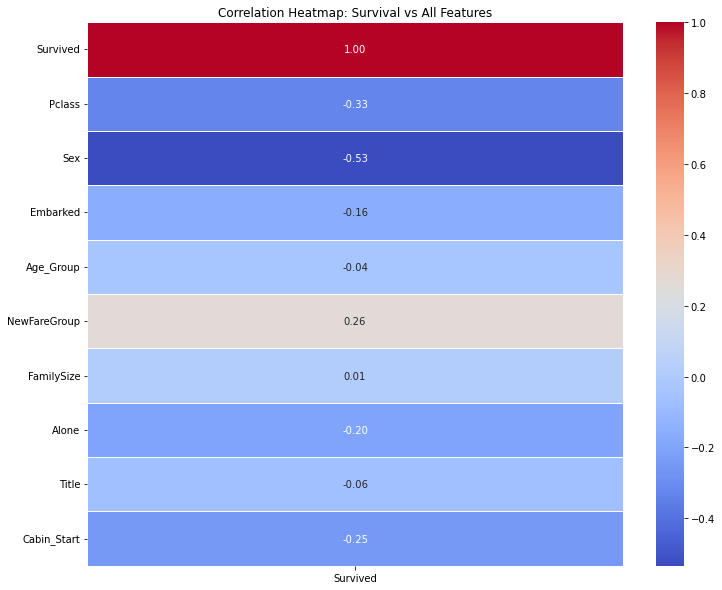

In [107]:
import matplotlib.pyplot as plt
correlation_matrix = train.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Survived']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Survival vs All Features')
plt.show()

In [108]:
X = train.drop(columns = {'Survived'})
Y = train['Survived']

In [109]:
X

,Pclass,Sex,Embarked,Age_Group,NewFareGroup,FamilySize,Alone,Title,Cabin_Start
0,3,1,2,1,0,1,0,2,5
1,1,0,0,2,2,1,0,3,2
2,3,0,2,1,0,0,1,1,5
3,1,0,2,2,2,1,0,3,2
4,3,1,2,2,0,0,1,2,5
...,...,...,...,...,...,...,...,...,...
886,2,1,2,1,0,0,1,4,5
887,1,0,2,1,2,0,1,1,1
888,3,0,2,1,0,3,0,1,5
889,1,1,0,1,2,0,1,2,2


In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [111]:
print(X.shape, X_train.shape, X_test.shape)

(871, 9) (696, 9) (175, 9)


## Model Training

### Logistic Regression

In [112]:
model = LogisticRegression()

In [113]:
# traning logistic regession model with train data
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [114]:
# Accuracy Score on traing data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0
 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1
 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 1 0 1 

In [115]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data: ', training_data_accuracy)

Accuracy score of training data:  0.8160919540229885


In [116]:
# Accuracy Score on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0]


In [117]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data: ', test_data_accuracy)

Accuracy score of test data:  0.7828571428571428
